# The Image Classification Dataset



Today, well-known **MNIST** dataset serves as more of sanity checks than as a benchmark.

Qualitatively similar, but comparatively more complex **Fashion-MNIST**
dataset,  released in 2017.


In [1]:
pip install d2l==1.0.0a1.post0  # notice the precise version


[notice] A new release of pip available: 22.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torchvision
from torchvision import transforms
from torch.utils import data
from matplotlib import pyplot as plt

#d2l.use_svg_display()

## Reading the Dataset

We can download and read the Fashion-MNIST image dataset **into memory** via the built-in functions in the framework.

When loading the data, some image operations can be applied on every image:
 - ``torchvision.transforms`` library has these transformations<br>
 https://pytorch.org/vision/stable/auto_examples/plot_transforms.html
 - transformations can be often specified with a ``transform`` keyword argument

In [3]:
# `ToTensor` converts the image data from PIL (Python Image Library) type to 32-bit floating point
# tensors. It divides all numbers by 255 so that all pixel values are between
# 0 and 1
trans = transforms.ToTensor()

mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

Fashion-MNIST consists of:
 - 10 categories
 - 60000 images in training dataset for each category
 - 10000 images in test dataset for each category
 - each set is a Dataset object, that can be inspected by indexing

Of course: a **test dataset** (or **test set**) is used for evaluating  model performance and not for training.

Consequently: 60,000  training and 10,000 test images, respectively.
 - each item is a 2-tuple: (image, label)

In [4]:
print("Training and test sample size:", (len(mnist_train), len(mnist_test)))
print("Type and length of the first item:", (type(mnist_train[0]), len(mnist_train[0])))

Training and test sample size: (60000, 10000)
Type and length of the first item: (<class 'tuple'>, 2)


A (digital) image is a rectangular regular grid whose points are  **pixels**:
 - (row, column) **position**: axis origin (0,0) at top-left corner, like matrix entry positions
 - for B/W images, namely **greyscale** images: a fractional value in $[0,1]$ or integer value in $\{0,...,255\}$ representing the **intensity of grey** (0=black). Other colours are not represented: 1 channel only

Fashion-MNIST's image size is: $height \times width = 28 \times 28$  
$h\times w : (h,w)$


In [5]:
print("Type and shape of the first image:", (type(mnist_train[0][0]), mnist_train[0][0].shape))

Type and shape of the first image: (<class 'torch.Tensor'>, torch.Size([1, 28, 28]))


In [6]:
print(mnist_train[0][0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

10 **Categories**: t-shirt, trousers, pullover, dress, coat, sandal, shirt, sneaker, bag, and ankle boot.

- Function for converting between numeric label **indices** and their **names** in text.


In [7]:
def get_fashion_mnist_labels(labels):
    """Return text labels from the corresponding numeric labels in the Fashion-MNIST dataset."""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

 -
Function for visualizing these examples


In [8]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # For images in Tensor format (the usual raw format)
            ax.imshow(img.numpy())
        else:
            # For images in PIL format (Python Image Library)
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

Here are the images and their corresponding labels (in text)
for the first few (2*9) examples in the training dataset.


torch.Size([18, 1, 28, 28])


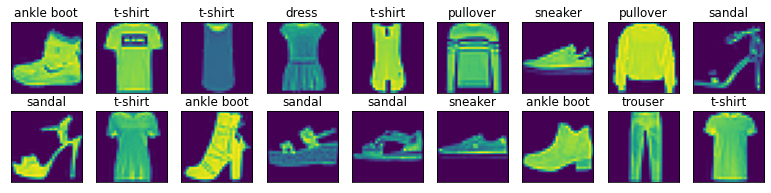

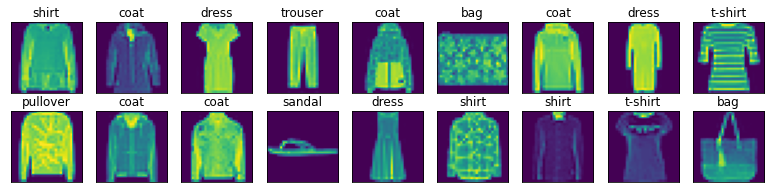

In [9]:
whole_dataset = iter(data.DataLoader(mnist_train, batch_size=18))
X, y = next(whole_dataset)
print(X.shape)
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));
X2, y2 = next(whole_dataset)
show_images(X2.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y2));

## Reading a Minibatch

We use the built-in data iterator.

- at each iteration, a DataLoader loads a **minibatch** of data with size `batch_size` from the data source into the main process and memory
  - PyTorch can run **multiple worker** processes to load data in parallel: `num_workers` parameter
    - The optimal `num_workers` value for efficiency depends on the batch size and your machine
    - A general place to start is to set `num_workers` equal to the number of CPU cores on that machine. You can get the number of CPU cores in python using `os.cpu_count()`, but note that depending on your batch size, you may incur RAM saturation.
- we also randomly **shuffle** the examples for the **training** data iterator (not needed for the test set)


In [10]:
batch_size = 256

def get_dataloader_workers():
    """Use as many processes working in parallel to read the data as # CPU cores.
    Other recommended range: 2 to 4"""
    import os
    return os.cpu_count()

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

Let us look at the time it takes to read the training data.


In [11]:
timer = d2l.Timer()
for X, y in (train_iter):
    continue
f'{timer.stop():.2f} sec'

'6.92 sec'

## Putting All Things Together

Define `load_data_fashion_mnist` function:
 - obtains and reads the Fashion-MNIST dataset
 - returns data iterators for both training set and validation set
 - optional argument to resize images to another shape


In [12]:
def load_data_fashion_mnist(batch_size, resize=None):
    """Download the Fashion-MNIST dataset and then load it into memory."""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

We want to test the image resizing feature

In [13]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


We are now ready to work with the Fashion-MNIST dataset.

## Summary

* Fashion-MNIST is an apparel classification dataset consisting of images representing 10 categories. We will use this dataset in subsequent sections and chapters to evaluate various classification algorithms.
* We store the shape of any image with height $h$ width $w$ pixels as $h \times w$ or ($h$, $w$).
* Data iterators are a key component for efficient performance. Rely on well-implemented data iterators that exploit high-performance computing to avoid slowing down your training loop.




## Exercises

1. Does reducing the `batch_size` (for instance, to 1) affect the reading performance? Try in the range 1 - 256, with step 50, and plot the corresponding reading time

## Solution

1. A possible solution using the `d2l.Timer` class:

In [ ]:
from matplotlib import pyplot as plt

T = list()
batch_size = range(1, 256, 50)

for b in batch_size:
    train_iter = data.DataLoader(mnist_train, b, shuffle=True,
                             num_workers=get_dataloader_workers())
    timer = d2l.Timer()
    for X, y in train_iter:
        continue
    T.append(timer.stop())

plt.plot(batch_size, T)
plt.xlabel('batch size')
plt.ylabel('sec')
plt.title('Reading performance')
plt.show()
